In [1]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from copy import deepcopy
from IPython.display import HTML
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Conway's game of life

[Conway's game of life](https://en.wikipedia.org/wiki/Conway%27s_Game_of_Life) is a cellular automata.

In [2]:
class Conway:
    def __init__(self, state, rules):
        self.state = state
        self.rows, self.cols = len(state), len(state[0])
        self.rules = rules
    
    def step(self):
        for rule in self.rules:
            new_state = rule(self.state)
        self.state = new_state
    
    def matrix(self):
        return np.array(self.state)

We simulate a forest fire here. 0 represents a dead cell, 1 represents a tree, 2 is a tree on fire.  
The rules tell us how to proceede to the next step.

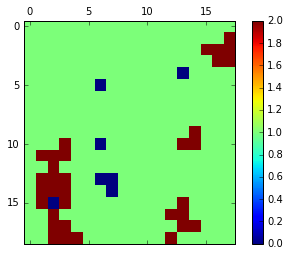

In [3]:
initial_state = [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2],
                [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2],
                [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1],
                [1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                [1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1],
                [1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                [1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                [1, 1, 2, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                [1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                [1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1],
                [1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                [1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1],
                [1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]

def get_nbd(state, r, c):
    rp1, rm1 = min(r + 1, len(state) - 1), max(0, r - 1)
    cp1, cm1 = min(c + 1, len(state[0]) - 1), max(0, c - 1)
    
    tl, t, tr = state[rm1][cm1], state[rm1][c], state[rm1][cp1]
    l, r = state[r][cm1], state[r][cp1]
    bl, b, br = state[rp1][cm1], state[rp1][c], state[rp1][cp1]
    
    return deepcopy((tl, t, tr, r, br, b, bl, l))
    
def spread_fire(state):
    new_state = deepcopy(state)
    for r, row in enumerate(state):
        for c, val in enumerate(row):
            fire_count = get_nbd(state, r, c).count(2)
            prob = fire_count / 8.
            if np.random.random() < prob:
                if val != 0:
                    new_state[r][c] = 2
    return new_state
rules = [spread_fire]

c = Conway(initial_state, rules)

def generate_data():
    global c
    c.step()
    return c.matrix()

def update(data):
    mat.set_data(data)
    return mat 

def data_gen():
    while True:
        yield generate_data()

fig, ax = plt.subplots()
mat = ax.matshow(generate_data())
plt.colorbar(mat)
ani = animation.FuncAnimation(fig, update, data_gen, interval=500,
                              save_count=50)
plt.show()

In [4]:
ani.save('../../support/videos/forest_fire.mp4')

![Animation](../../support/videos/forest_fire.mp4)